**Business Problem Statement:** An educational institution wants to improve student performance by identifying factors that influence academic success.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pathlib import Path

# Suppress all warnings
warnings.filterwarnings('ignore')
import random 

In [2]:
df = pd.read_csv('../Data/student_performance_data.csv')

In [3]:
df.shape

(1000, 9)

In [4]:
df.head()

,StudentID,Age,Gender,SocioeconomicStatus,Grades,Attendance,TimeSpentOnHomework,ClassParticipation,AcademicPerformanceStatus
0,S0001,21,Female,High,73.821849,99.578045,3.153141,Medium,Pass
1,S0002,18,Female,Low,61.301450,95.580772,3.160019,Medium,Pass
2,S0003,19,Female,Low,82.023802,74.858691,1.594093,Low,Pass
3,S0004,21,Male,Low,98.949056,67.806661,1.937389,Medium,Pass
4,S0005,17,Female,Middle,80.174655,79.575701,1.233916,High,Pass


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  1000 non-null   object 
 1   Age                        1000 non-null   int64  
 2   Gender                     1000 non-null   object 
 3   SocioeconomicStatus        1000 non-null   object 
 4   Grades                     1000 non-null   float64
 5   Attendance                 1000 non-null   float64
 6   TimeSpentOnHomework        1000 non-null   float64
 7   ClassParticipation         1000 non-null   object 
 8   AcademicPerformanceStatus  1000 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


In [6]:
df.describe(include='all')

,StudentID,Age,Gender,SocioeconomicStatus,Grades,Attendance,TimeSpentOnHomework,ClassParticipation,AcademicPerformanceStatus
count,1000,1000.0000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000
unique,1000,NaN,2,3,NaN,NaN,NaN,3,2
top,S1000,NaN,Male,Middle,NaN,NaN,NaN,Medium,Pass
freq,1,NaN,507,506,NaN,NaN,NaN,486,806
mean,NaN,17.9600,NaN,NaN,74.892793,79.448395,2.245859,NaN,NaN
std,NaN,2.0036,NaN,NaN,14.428974,11.417765,1.009563,NaN,NaN
min,NaN,15.0000,NaN,NaN,50.000582,60.001229,0.500795,NaN,NaN
25%,NaN,16.0000,NaN,NaN,62.442623,69.451976,1.400813,NaN,NaN
50%,NaN,18.0000,NaN,NaN,75.155411,79.329503,2.191778,NaN,NaN
75%,NaN,20.0000,NaN,NaN,87.201111,89.137688,3.131317,NaN,NaN


In [7]:
numerical_columns = ['Age','Grades',	'Attendance',	'TimeSpentOnHomework']
categorical_columns = ['Gender',	'SocioeconomicStatus'	,'ClassParticipation']
target_column = ['AcademicPerformanceStatus']

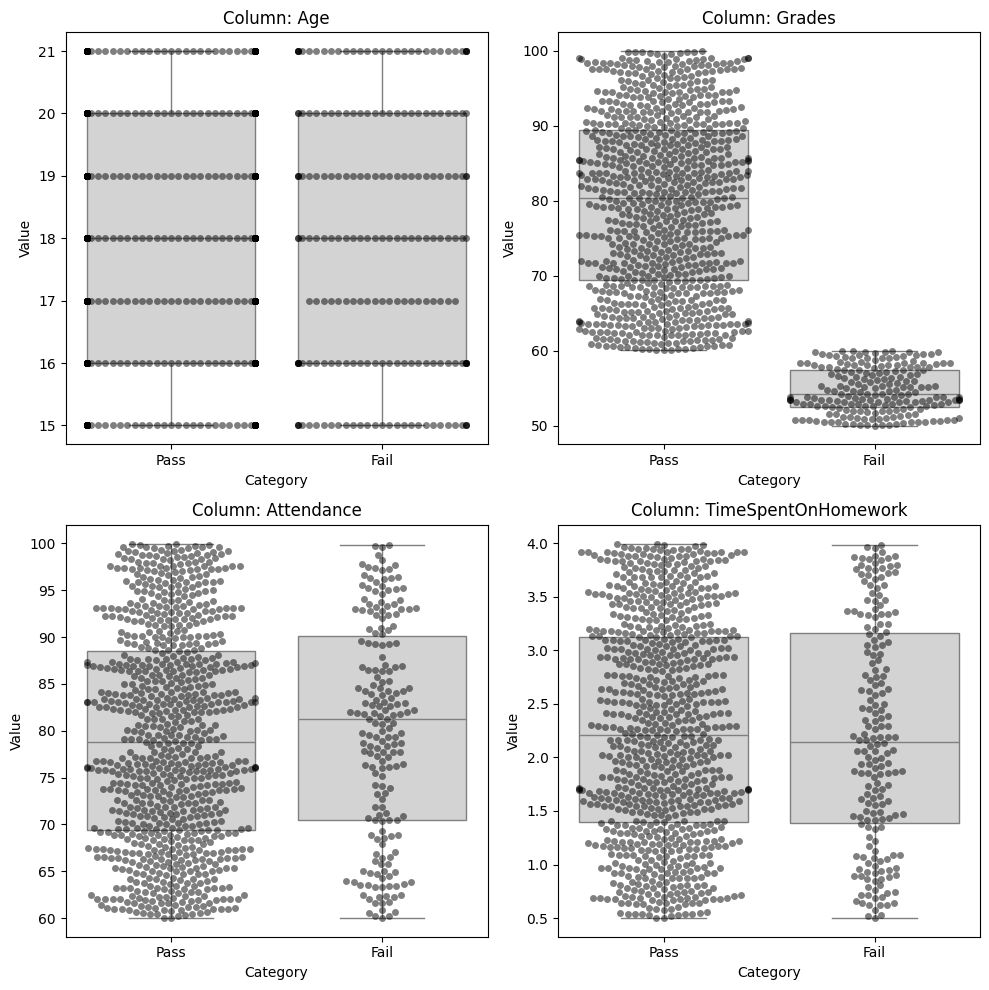

In [8]:
# Set the number of rows and columns for subplots (based on number of categories)
n_cols = 2 # Number of columns in the subplot grid
n_rows = 2  # Number of rows needed for the subplots

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5*n_rows))
axes = axes.flatten()  # Flatten the axes array to easily iterate over it

# Loop through each category and create a plot
for idx, col in enumerate(numerical_columns):
    # Subset the data for the current category


    # Plot the data
    sns.boxplot(x='AcademicPerformanceStatus', y=col, data=df, color='lightgray',ax=axes[idx])  # Boxplot with light gray color
    sns.swarmplot(x='AcademicPerformanceStatus', y=col, data=df, color='black', alpha=0.5,ax=axes[idx])
    axes[idx].set_title(f'Column: {col}')
    axes[idx].set_ylabel('Value')
    axes[idx].set_xlabel('Category')

# Remove empty subplots if the number of categories doesn't fit evenly
for idx in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()  # Adjust layout
plt.show()

After observing the above visualizations we can conclude that the above numerical independent columns 
are approximately uniformly distributed except grades attribute .  
So , we can conclude that if grade is greater than or equal to 60 then that student is pass otherwise that the student is fail .

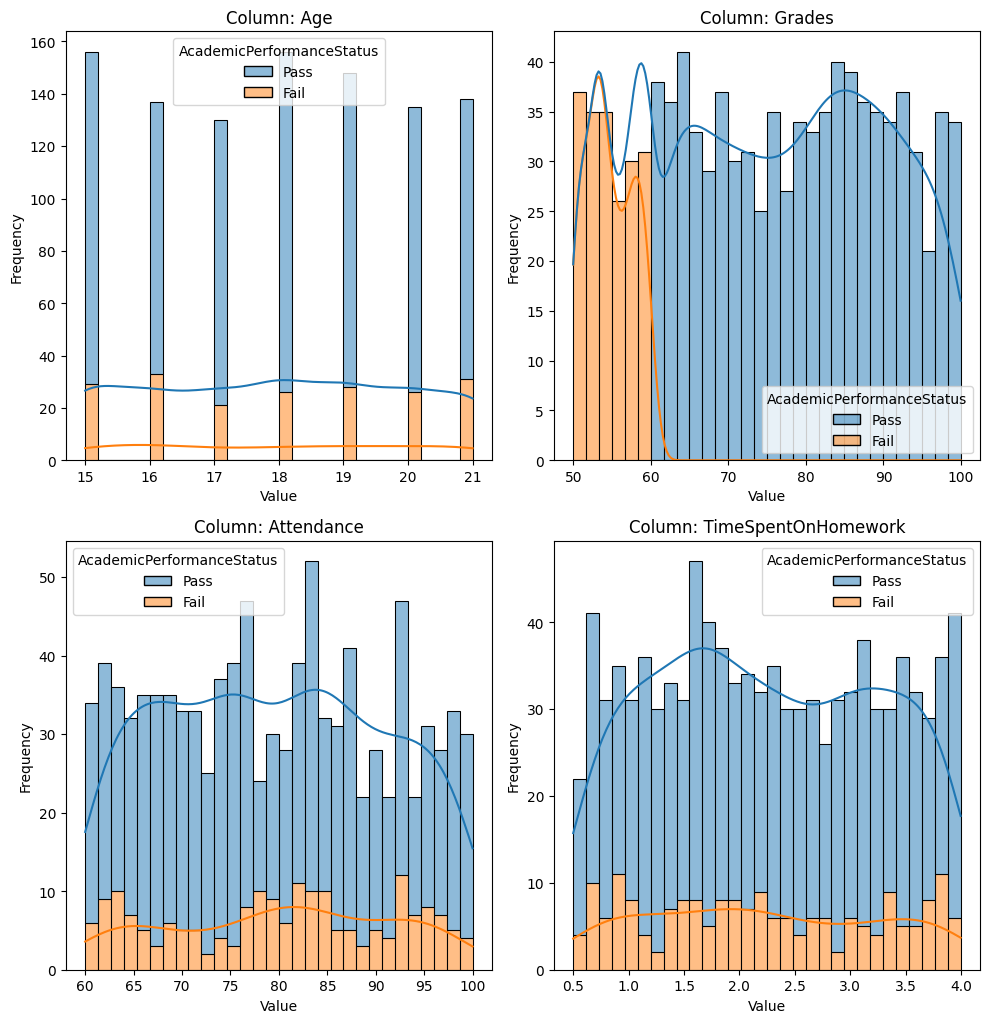

In [9]:
# Set the number of rows and columns for subplots (based on number of categories)
n_cols = 2  # Number of columns in the subplot grid
n_rows = 3  # Number of rows needed for the subplots

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5*n_rows))
axes = axes.flatten()  # Flatten the axes array to easily iterate over it

# Loop through each category and create a plot
for idx, col in enumerate(numerical_columns):
    # Subset the data for the current category


    # Plot the data
    sns.histplot(df, x=col, hue=target_column[0], kde=True, ax=axes[idx], multiple='stack', bins=30)
    axes[idx].set_title(f'Column: {col}')
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_xlabel('Value')

# Remove empty subplots if the number of categories doesn't fit evenly
for idx in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()  # Adjust layout
plt.show()

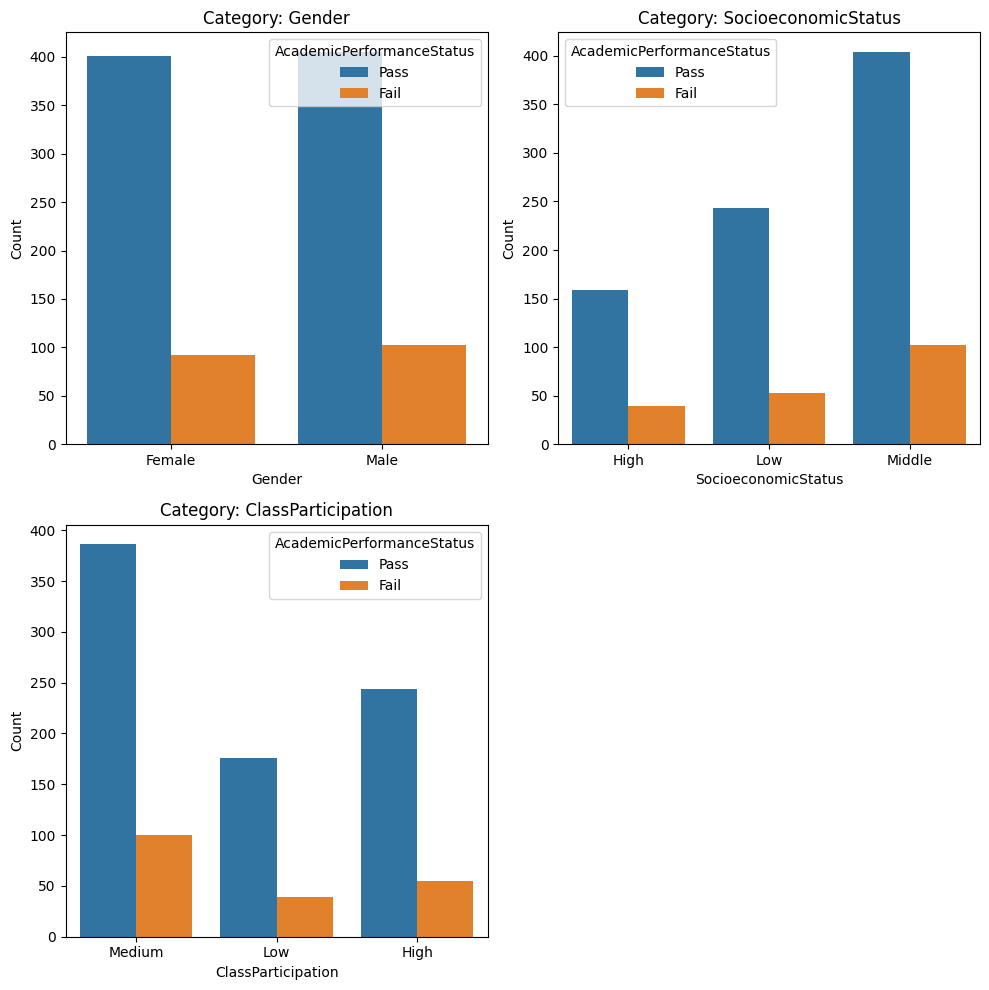

In [10]:
# Set the number of rows and columns for subplots (based on number of categories)
n_cols = 2  # Number of columns in the subplot grid
n_rows = 2  # Number of rows needed for the subplots

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5*n_rows))
axes = axes.flatten()  # Flatten the axes array to easily iterate over it

# Loop through each category and create a plot
for idx, col in enumerate(categorical_columns):
    # Subset the data for the current category


    # Plot the data
    sns.countplot(x=col, hue='AcademicPerformanceStatus', data=df,ax=axes[idx])
    axes[idx].set_title(f'Category: {col}')
    axes[idx].set_ylabel('Count')
    axes[idx].set_xlabel(col)

# Remove empty subplots if the number of categories doesn't fit evenly
for idx in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()  # Adjust layout
plt.show()

After observing the above visualizations we can conclude that the above Categorical independent columns 
are approximately similarly distributed aganist to the categories of the target variable like Student Performance  Status . 

Those who have socioeconomic status is middle seems to have  more pass percentage compared to others .